#Importing & Installing packages

In [1]:
import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns



In [5]:
!pip install scikit-learn

In [3]:
!pip install category_encoders
!pip install flaml

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"

     |████████████████████████████████| 80 kB 3.2 MB/s 
     |████████████████████████████████| 206 kB 3.9 MB/s 
     |████████████████████████████████| 69.2 MB 4.7 kB/s 
     |████████████████████████████████| 2.0 MB 27.2 MB/s 
     |████████████████████████████████| 22.3 MB 33 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

import itertools

import scipy

In [6]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 3
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([1, 2,3], [1,2,3], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

#Importing File

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1yvNxI9wBle05flT_Y1AYDzuZ0aouytLY"})
downloaded.GetContentFile('training.csv')

import pandas as pd
df = pd.read_csv('training.csv', header=0) 
df.head()
df.info()

#Feature Engineering



In [ ]:
#Removing outliers, min-max for age, height..
#Standardization of integers
#Creating array for categorical features (hot-encoding)
#IMP.Label encoding to a few categorical features should be done too, xgboost will love it...

#Target encoding...

#Can combine some features too.. * + - / #autofeat library

#encoder= ce.MEstimateEncoder(cols=[])
#encoder= ce.TargetEncoder

#For Target encoding
#import category_encoders as ce 

In [5]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


Data Cleaning - Turning strings into categories

In [6]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')

df['damage_grade'] = df['damage_grade'].astype('category')

df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('category')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('category')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('category')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('category')
df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('category')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('category')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('category')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('category')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('category')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('category')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('category')
df['has_secondary_use'] = df['has_secondary_use'].astype('category')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('category')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('category')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('category')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('category')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('category')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('category')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('category')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('category')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('category')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('category')

df['geo_level_1_id'] = df['geo_level_1_id'].astype('category')
df['geo_level_2_id'] = df['geo_level_2_id'].astype('category')
df['geo_level_3_id'] = df['geo_level_3_id'].astype('category')


In [7]:
#Package for visualizations
!pip install -U yellowbrick

Testing & Training Split

In [61]:
X = df.drop(columns = 'damage_grade')
y = df['damage_grade']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

SHOWING THE IMBALANCE OF THE DATASET

In [ ]:
! pip install pycaret

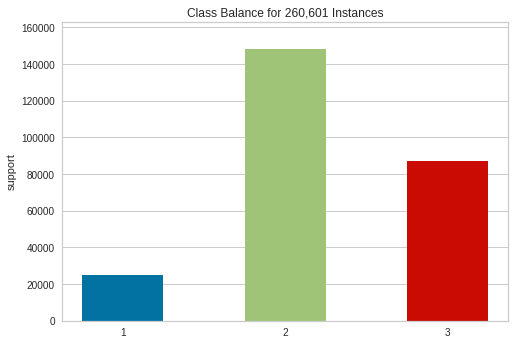

In [9]:
#THERE IS IMBALANCE IN DATA AS SEEN BELOW

from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = df, df['damage_grade']

# Instantiate the visualizer
visualizer = ClassBalance(labels=["1", "2", "3"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
X_train.info()

In [62]:
#Applying transformations to integer features..

from sklearn import preprocessing

#Removing Outliers and standardizing
scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_train[['age']])
X_train['age'] = scaler.transform(X_train[['age']])

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_train[['height_percentage']])
X_train['height_percentage'] = scaler.transform(X_train[['height_percentage']]) 

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_train[['area_percentage']])
X_train['area_percentage'] = scaler.transform(X_train[['area_percentage']])   

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_train[['count_floors_pre_eq']])
X_train['count_floors_pre_eq'] = scaler.transform(X_train[['count_floors_pre_eq']]) 

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_train[['count_families']])
X_train['count_families'] = scaler.transform(X_train[['count_families']]) 

#Feature Engineering to the Testing Dataset...

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_test[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_test[['height_percentage']])
X_test['height_percentage'] = scaler.transform(X_test[['height_percentage']]) 

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_test[['area_percentage']])
X_test['area_percentage'] = scaler.transform(X_test[['area_percentage']]) 

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_test[['count_floors_pre_eq']])
X_test['count_floors_pre_eq'] = scaler.transform(X_test[['count_floors_pre_eq']])

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X_test[['count_families']])
X_test['count_families'] = scaler.transform(X_test[['count_families']]) 

#Adding new Age*Height Feature...

X_train['A_H'] = X_train['area_percentage'] * X_train['height_percentage']

X_test['A_H'] = X_test['area_percentage'] * X_test['height_percentage']


In [ ]:
#FE Using Clusters and Associations given by Data Robot..

In [11]:
X_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,A_H,Mean_AH
66737,184292,12,32,5472,1.098612,3.433987,2.397895,1.945910,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,0.693147,0,0,0,0,0,0,0,0,0,0,0,4.666089,-0.797398
9080,85957,17,663,7897,1.098612,3.258097,2.197225,1.791759,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,0.693147,0,0,0,0,0,0,0,0,0,0,0,3.936898,-0.068207
41043,227366,3,175,6765,1.386294,4.189655,1.945910,1.945910,t,r,q,f,q,j,d,1,0,0,0,1,1,0,0,0,0,0,v,0.693147,0,0,0,0,0,0,0,0,0,0,0,3.786566,0.082125
90163,617536,26,762,10530,1.098612,3.433987,1.945910,1.945910,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0.693147,1,1,0,0,0,0,0,0,0,0,0,3.786566,0.082125
225250,406641,12,309,8039,1.098612,3.258097,1.945910,1.609438,t,r,n,f,q,s,d,0,1,0,0,0,0,1,1,0,0,0,v,0.693147,0,0,0,0,0,0,0,0,0,0,0,3.131822,0.736870


In [ ]:
def plot_hist(ax, feature, title):
    ax.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    ax.set_title(title, fontsize=20);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);

plt.figure(figsize=(16, 10));
plt.grid(True);
plot_hist(plt.subplot(3, 2, 1), X['age'], 'Age')
plot_hist(plt.subplot(3, 2, 2), X['height_percentage'], 'Height')
plot_hist(plt.subplot(3, 2, 3), X['area_percentage'], 'Area')
plot_hist(plt.subplot(3, 2, 4), X['geo_level_1_id'], 'Region 1')
plot_hist(plt.subplot(3, 2, 5), X['geo_level_2_id'], 'Region 2')
plot_hist(plt.subplot(3, 2, 6), X['geo_level_3_id'], 'Region 3')

#plt.title('Amount', fontsize=20)
plt.tight_layout();
#plt.savefig('out/german_credit-transforms.png');


Categorical Feature Engineering using Target Encoding

In [ ]:
categorical_features = df.select_dtypes(include=['category']).drop(['damage_grade'], axis=1).columns

#CAN RUN THIS FOR FITTING MORE CATEGORICAL FEATURES IN TARGET ENCODING...

In [ ]:
#ce_me = ce.MEstimateEncoder(cols = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status'],randomized=True)
#ce_me.fit_transform(X_train,y_train)

In [63]:
ce_me = ce.MEstimateEncoder(cols = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status','has_superstructure_adobe_mud',
                                    'has_superstructure_mud_mortar_stone','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_cement_mortar_stone',
                                    'has_secondary_use','has_superstructure_timber','has_superstructure_stone_flag','has_superstructure_cement_mortar_brick','has_superstructure_bamboo','has_secondary_use_agriculture'],m=2)

X_train_fe=ce_me.fit_transform(X_train,y_train)
X_test_fe=ce_me.transform(X_test)

In [13]:
X_train_fe.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,A_H,Mean_AH
66737,184292,2.143230,2.032826,2.068167,1.098612,3.433987,2.397895,1.945910,2.234233,2.329571,2.269499,2.309193,2.297339,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.108517,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,4.666089,-0.797398
9080,85957,2.794539,2.798505,2.776110,1.098612,3.258097,2.197225,1.791759,2.234233,2.329571,2.269499,2.309193,2.315117,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,3.936898,-0.068207
41043,227366,2.326611,2.146757,2.175503,1.386294,4.189655,1.945910,1.945910,2.234233,2.329571,2.320903,2.309193,2.315117,2.153817,2.243951,2.347069,1.921456,2.231032,2.243563,1,1.692752,2.263726,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,3.786566,0.082125
90163,617536,1.731230,1.982795,2.101754,1.098612,3.433987,1.945910,1.945910,2.234233,2.329571,2.269499,2.309193,2.315117,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.263726,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.100150,2.260230,0,0,0,0,0,0,0,0,0,3.786566,0.082125
225250,406641,2.143230,2.182253,2.079528,1.098612,3.258097,1.945910,1.609438,2.234233,2.329571,2.269499,2.309193,2.315117,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.108517,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,3.131822,0.736870


In [64]:
X_train_fe['F1'] = X_train_fe['has_secondary_use'] * X_train_fe['has_secondary_use_agriculture']

X_train_fe['F2'] = X_train_fe['height_percentage'] * X_train_fe['count_floors_pre_eq']

X_train_fe['F3'] = X_train_fe['has_superstructure_cement_mortar_brick'] + X_train_fe['has_superstructure_mud_mortar_stone']

X_train_fe['F4'] = X_train_fe['has_superstructure_bamboo'] + X_train_fe['has_superstructure_timber']

X_train_fe['F5'] = X_train_fe['ground_floor_type'] + X_train_fe['has_superstructure_cement_mortar_brick']

X_train_fe['F6'] = X_train_fe['foundation_type'] + X_train_fe['has_superstructure_rc_engineered']

X_train_fe['F7'] = X_train_fe['height_percentage'] + X_train_fe['other_floor_type']

X_train_fe['F8'] = X_train_fe['foundation_type'] * X_train_fe['ground_floor_type']

In [16]:
X_train_fe.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,A_H,Mean_AH,F1,F2,F3,F4,F5,F6,F7,F8
66737,184292,2.143230,2.032826,2.068167,1.098612,3.433987,2.397895,1.945910,2.234233,2.329571,2.269499,2.309193,2.297339,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.108517,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,4.666089,-0.797398,5.046820,2.137801,4.620797,4.273594,4.592294,4.58194,4.243250,5.379431
9080,85957,2.794539,2.798505,2.776110,1.098612,3.258097,2.197225,1.791759,2.234233,2.329571,2.269499,2.309193,2.315117,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,3.936898,-0.068207,5.046820,1.968449,4.620797,4.415806,4.592294,4.58194,4.106877,5.379431
41043,227366,2.326611,2.146757,2.175503,1.386294,4.189655,1.945910,1.945910,2.234233,2.329571,2.320903,2.309193,2.315117,2.153817,2.243951,2.347069,1.921456,2.231032,2.243563,1,1.692752,2.263726,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,3.786566,0.082125,5.046820,2.697604,3.614208,4.514454,4.001946,4.58194,4.261028,5.379431
90163,617536,1.731230,1.982795,2.101754,1.098612,3.433987,1.945910,1.945910,2.234233,2.329571,2.269499,2.309193,2.315117,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.263726,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.100150,2.260230,0,0,0,0,0,0,0,0,0,3.786566,0.082125,4.746823,2.137801,4.620797,4.514454,4.592294,4.58194,4.261028,5.379431
225250,406641,2.143230,2.182253,2.079528,1.098612,3.258097,1.945910,1.609438,2.234233,2.329571,2.269499,2.309193,2.315117,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.108517,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,0,0,0,0,0,0,0,0,3.131822,0.736870,5.046820,1.768148,4.620797,4.273594,4.592294,4.58194,3.924555,5.379431


Applying Same Feature Engineering to the Testing Dataset

In [65]:
#Dropping columns with 0 variation in training set
X_train_fe = X_train_fe.drop(columns = ['other_floor_type','ground_floor_type','count_floors_pre_eq','has_secondary_use_rental','has_secondary_use_hotel','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other'])


In [66]:
X_test_fe['F1'] = X_test_fe['has_secondary_use'] * X_test_fe['has_secondary_use_agriculture']

X_test_fe['F2'] = X_test_fe['height_percentage'] * X_test_fe['count_floors_pre_eq']

X_test_fe['F3'] = X_test_fe['has_superstructure_cement_mortar_brick'] + X_test_fe['has_superstructure_mud_mortar_stone']

X_test_fe['F4'] = X_test_fe['has_superstructure_bamboo'] + X_test_fe['has_superstructure_timber']

X_test_fe['F5'] = X_test_fe['ground_floor_type'] + X_test_fe['has_superstructure_cement_mortar_brick']

X_test_fe['F6'] = X_test_fe['foundation_type'] + X_test_fe['has_superstructure_rc_engineered']

X_test_fe['F7'] = X_test_fe['height_percentage'] + X_test_fe['other_floor_type']

X_test_fe['F8'] = X_test_fe['foundation_type'] * X_test_fe['ground_floor_type']

In [67]:
#Dropping columns with 0 variation in testing set
X_test_fe = X_test_fe.drop(columns = ['other_floor_type','ground_floor_type','count_floors_pre_eq','has_secondary_use_rental','has_secondary_use_hotel','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other'])

In [ ]:
messi= X_train_fe.select_dtypes(include='number')

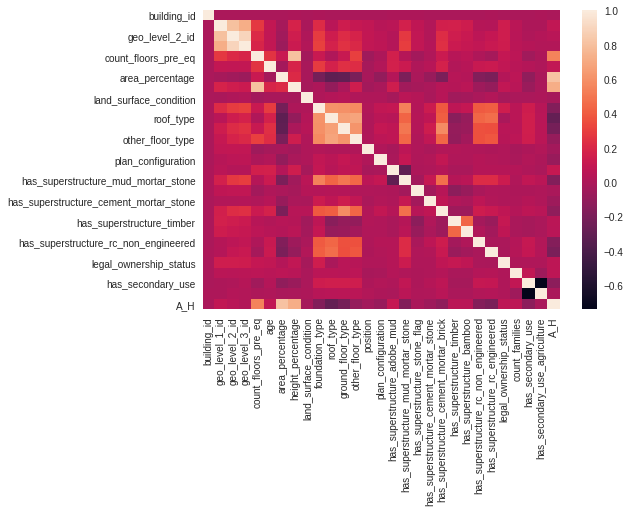

In [ ]:
corr = messi.corr()
sns.heatmap(corr)

In [68]:
X_train_fe.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_industry,A_H,F1,F2,F3,F4,F5,F6,F7,F8
66737,184292,2.143230,2.032826,2.068167,3.433987,2.397895,1.945910,2.234233,2.329571,2.269499,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.108517,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,4.666089,5.046820,2.137801,4.620797,4.273594,4.592294,4.58194,4.243250,5.379431
9080,85957,2.794539,2.798505,2.776110,3.258097,2.197225,1.791759,2.234233,2.329571,2.269499,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,3.936898,5.046820,1.968449,4.620797,4.415806,4.592294,4.58194,4.106877,5.379431
41043,227366,2.326611,2.146757,2.175503,4.189655,1.945910,1.945910,2.234233,2.329571,2.320903,2.153817,2.243951,2.347069,1.921456,2.231032,2.243563,1,1.692752,2.263726,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,3.786566,5.046820,2.697604,3.614208,4.514454,4.001946,4.58194,4.261028,5.379431
90163,617536,1.731230,1.982795,2.101754,3.433987,1.945910,1.945910,2.234233,2.329571,2.269499,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.263726,2.250728,2.258799,2.252369,0,2.244519,0.693147,2.100150,2.260230,0,3.786566,4.746823,2.137801,4.620797,4.514454,4.592294,4.58194,4.261028,5.379431
225250,406641,2.143230,2.182253,2.079528,3.258097,1.945910,1.609438,2.234233,2.329571,2.269499,2.229152,2.243951,2.228023,2.337697,2.231032,2.243563,0,2.283100,2.165077,2.108517,2.258799,2.252369,0,2.244519,0.693147,2.255972,2.237093,0,3.131822,5.046820,1.768148,4.620797,4.273594,4.592294,4.58194,3.924555,5.379431


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_industry,has_secondary_use_other
170377,739427,1.942074,1.676139,2.043431,1.386294,3.258097,1.098612,1.791759,2.251430,2.329752,2.269715,2.309266,2.297971,2.229486,2.279423,2.347866,1.922090,2.231378,0,0,2.283197,2.263805,0,2.259074,2.252682,0,2.244698,0.693147,2.256289,0,0,0,0,0
184895,17201,2.165634,2.439337,2.297089,1.386294,3.713572,2.397895,2.197225,2.295817,2.329752,2.269715,2.309266,2.315472,2.309835,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.263805,0,2.259074,2.252682,0,2.244698,0.000000,2.100317,0,0,1,0,0
26740,723805,2.300012,2.630278,2.641296,1.098612,3.828641,2.197225,1.791759,2.234640,2.329752,2.269715,2.309266,2.315472,2.229486,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.263805,0,2.259074,2.252682,0,2.407406,0.693147,2.256289,0,0,0,0,0
198210,891512,2.300012,2.136584,2.081517,1.098612,3.433987,2.079442,1.609438,2.234640,2.329752,2.269715,1.637759,2.315472,2.229486,2.244190,2.228304,2.337704,2.231378,1,0,2.283197,2.263805,0,2.259074,2.252682,0,2.244698,0.693147,2.256289,0,0,0,0,0
254313,484350,2.794519,2.946126,2.847774,1.386294,3.433987,1.945910,2.079442,2.234640,2.329752,2.321114,2.309266,2.315472,2.229486,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.263805,0,2.259074,2.252682,0,2.244698,0.693147,2.256289,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,79888,1.942074,2.103228,2.241218,1.098612,3.258097,1.945910,1.791759,2.234640,2.329752,2.321114,2.309266,2.297971,2.229486,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.263805,0,2.259074,2.252682,0,2.244698,0.000000,2.256289,0,0,0,0,0
103694,442764,2.342461,2.274673,2.810617,1.098612,1.791759,1.791759,1.609438,2.251430,2.329752,2.269715,2.309266,2.315472,2.229486,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.165866,0,2.259074,2.252682,0,2.244698,0.693147,2.256289,0,0,0,0,0
131932,17256,2.479752,2.150902,2.075083,1.386294,3.044522,3.135494,2.079442,2.295817,2.329752,2.321114,2.309266,2.315472,2.229486,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.165866,0,2.259074,2.252682,0,2.244698,0.693147,2.100317,0,1,0,0,0
146867,496181,2.342461,2.165885,2.100682,1.386294,2.397895,2.484907,2.079442,2.234640,2.329752,2.321114,2.309266,2.315472,2.229486,2.244190,2.228304,2.337704,2.231378,0,0,2.283197,2.263805,0,2.259074,2.252682,0,2.244698,0.693147,2.256289,0,0,0,0,0


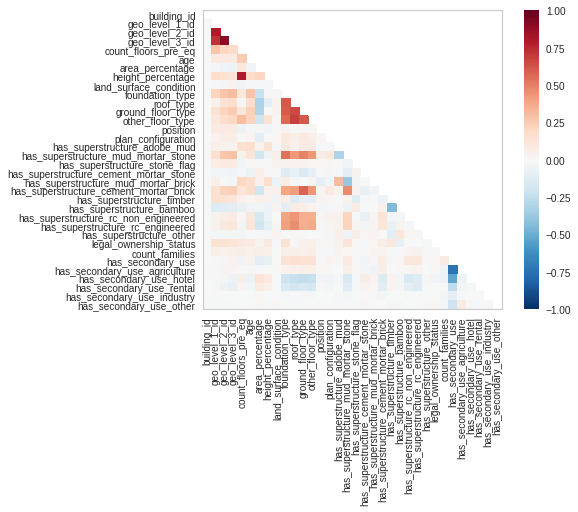

In [ ]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X_train_fe)

In [ ]:
#@title
#numeric_features = adults_data.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = adults_data.select_dtypes(include=['object']).drop(['income'], axis=1).columns

#X = adults_data.drop('income', axis=1)
#y = adults_data['income']

#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

THE FOLLOWING PIPELINE CODE IS TELLING US WHICH CATEGORY ENCODING IS BEST FOR A SIMPLE RANDOM FOREST MODEL

In [ ]:
#@title
encoder_list = [ce.hashing.HashingEncoder,
                ce.helmert.HelmertEncoder,
                ce.james_stein.JamesSteinEncoder,
                ce.m_estimate.MEstimateEncoder,
                ce.polynomial.PolynomialEncoder,
                ce.woe.WOEEncoder
                ]
for encoder in encoder_list:
    
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('woe', encoder())])
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])
    
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=500))])
    
    model = pipe.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(encoder)
    print(f1_score(y_test, y_pred, average='macro'))

<class 'category_encoders.hashing.HashingEncoder'>
0.44247057449246663


FINDING BEST MODEL USING FLAML 

In [69]:
from flaml import AutoML
automl = AutoML()


settings = {
    "metric": 'micro_f1',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
    "log_file_name": 'earthquake_experiment.log',
    "eval_method":'auto',
    "model_history":True
}

In [70]:
automl.fit(X_train=X_train_fe, y_train=y_train, **settings)

[flaml.automl: 07-31 22:52:25] {913} INFO - Evaluation method: holdout
[flaml.automl: 07-31 22:52:25] {607} INFO - Using StratifiedKFold
[flaml.automl: 07-31 22:52:25] {934} INFO - Minimizing error metric: 1-micro_f1
[flaml.automl: 07-31 22:52:25] {954} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 07-31 22:52:25] {1020} INFO - iteration 0, current learner lgbm
[flaml.automl: 07-31 22:52:25] {1180} INFO -  at 2.3s,	best lgbm's error=0.2928,	best lgbm's error=0.2928
[flaml.automl: 07-31 22:52:25] {1020} INFO - iteration 1, current learner lgbm
[flaml.automl: 07-31 22:52:25] {1180} INFO -  at 2.5s,	best lgbm's error=0.2928,	best lgbm's error=0.2928
[flaml.automl: 07-31 22:52:25] {1020} INFO - iteration 2, current learner lgbm
[flaml.automl: 07-31 22:52:26] {1180} INFO -  at 2.6s,	best lgbm's error=0.2659,	best lgbm's error=0.2659
[flaml.automl: 07-31 22:52:26] {1020} INFO - iteration 3, current learner xgboost
[flaml.

**- While running the FLAML AutoML algorithm, LGBmodel came out to be the best one with the best error on 0.2467 when it ran different models such as XGboost, Random Forests, Extra-tree & Cat-boost. This was achieved with 62 iterations. The Best parameter is given below:**

In [71]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.9930577047295022,
               learning_rate=0.10653852350625627, max_bin=256,
               min_child_samples=18, n_estimators=29, num_leaves=125,
               objective='multiclass', reg_alpha=0.0009765625,
               reg_lambda=1.8287241464057549, subsample=0.9025475651868093)

In [ ]:
#With 0.2460 Error

LGBMClassifier(colsample_bytree=0.8943647935086437,
               learning_rate=0.056400588987393634, max_bin=256,
               min_child_samples=28, n_estimators=57, num_leaves=94,
               objective='multiclass', reg_alpha=0.0009765625,
               reg_lambda=0.1253970491528328, subsample=0.9377924838515587)

In [72]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

print('Best hyperparmeter config:', automl.best_config)

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 29, 'num_leaves': 125, 'min_child_samples': 18, 'learning_rate': 0.10653852350625627, 'subsample': 0.9025475651868093, 'log_max_bin': 9, 'colsample_bytree': 0.9930577047295022, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.8287241464057549, 'FLAML_sample_size': 175905}
Best accuracy on validation data: 0.7567
Training duration of best run: 5.936 s
Best hyperparmeter config: {'n_estimators': 29, 'num_leaves': 125, 'min_child_samples': 18, 'learning_rate': 0.10653852350625627, 'subsample': 0.9025475651868093, 'log_max_bin': 9, 'colsample_bytree': 0.9930577047295022, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.8287241464057549, 'FLAML_sample_size': 175905}


In [ ]:
#automl.fit(X_train, y_train, metric='micro_f1', task="classification", estimator_list=['lgbm', 'xgboost', 'catboost', 'rf', 'extra_tree'], eval_method='cv',n_splits=5, model_history=True, log_training_metric=True)

In [73]:
#PREDICTING ON THE TESTING SET
y_pred_lgbm = automl.predict(X_test_fe)

y_pred_prob_lgbm=automl.predict_proba(X_test_fe)

In [75]:
#@title
print(y_pred_lgbm)

[3 1 2 ... 2 3 1]


MODEL PERFORMANCE

In [76]:
#@title
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_lgbm)

array([[ 3268,  2999,    80],
       [ 1480, 31097,  4417],
       [  127,  8124, 13559]])

In [77]:
#@title
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           1       0.67      0.51      0.58      6347
           2       0.74      0.84      0.79     36994
           3       0.75      0.62      0.68     21810

    accuracy                           0.74     65151
   macro avg       0.72      0.66      0.68     65151
weighted avg       0.73      0.74      0.73     65151



In [ ]:
#FEATURE SELECTION
#If want to improve more on the model...
from sklearn.feature_selection import SelectKBest, chi2

sel=SelectKBest(chi2,k='all')
sel=sel.fit(X_train_fe,y_train)

X_train_new = sel.transform(X_train_fe)
X_test_new = sel.transform(X_test_fe)

MANUALLY RUNNING THE LGBM MODEL FOR CLASSIFICATION VISUALIZATIONS. 

In [78]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(colsample_bytree=0.9930577047295022,
               learning_rate=0.10653852350625627, max_bin=256,
               min_child_samples=18, n_estimators=29, num_leaves=125,
               objective='multiclass', reg_alpha=0.0009765625,
               reg_lambda=1.8287241464057549, subsample=0.9025475651868093)



In [79]:
lgbm.fit(X_train_fe, y_train)

LGBMClassifier(colsample_bytree=0.9930577047295022,
               learning_rate=0.10653852350625627, max_bin=256,
               min_child_samples=18, n_estimators=29, num_leaves=125,
               objective='multiclass', reg_alpha=0.0009765625,
               reg_lambda=1.8287241464057549, subsample=0.9025475651868093)

In [80]:
test_lgbm = lgbm.predict(X_test_fe)

test_prob_lgbm=lgbm.predict_proba(X_test_fe)

In [81]:
class_names = [str(x) for x in lgbm.classes_]

#Visualization of the Best Model

In [82]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, test_lgbm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, test_lgbm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, test_lgbm,average='macro')))
print("Log Loss = {:.2f}".format(log_loss(y_test, test_prob_lgbm)))

Accuracy = 0.74
Kappa = 0.50
F1 Score = 0.68
Log Loss = 0.60


In [118]:
# Lets look at the model metrics

print('Metrics of the Light Gradient Boosting Model: \n')

cm = np.transpose(confusion_matrix(y_test, test_lgbm))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, test_lgbm))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, test_lgbm)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, test_lgbm)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, test_lgbm)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, test_lgbm)))


Metrics of the Light Gradient Boosting Model: 

Confusion matrix: 
[[ 3262  1460   124]
 [ 3004 31121  8155]
 [   81  4413 13531]]
                                   Accuracy: 0.8850876515561047
                   SENSITIVITY (aka RECALL): 0.955188606856757
                 SPECIFICITY (aka FALL-OUT): 0.5205872965209065
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.911970695970696
                 NEGATIVE PREDICTIVE VALUE): 0.6908089792460822


In [83]:
from sklearn.metrics import classification_report

0.7354300010744271

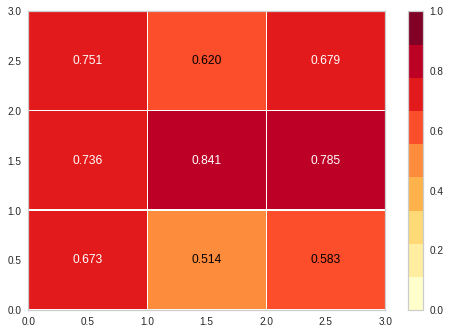

In [84]:
# Visualizing LGBM Model
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(lgbm,force_model=True)

visualizer.fit(X_train_fe, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_fe, y_test)  # Evaluate the model on the test data

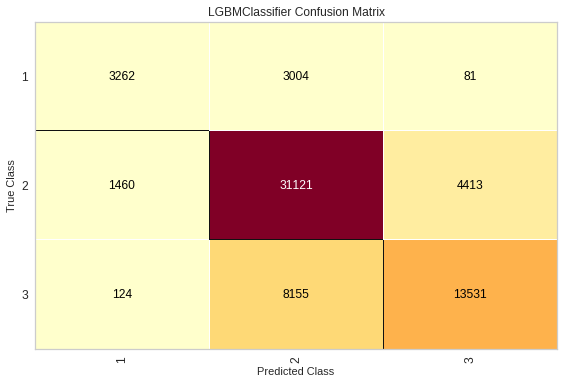

In [85]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(lgbm)

cm.score(X_test_fe, y_test)

cm.show()


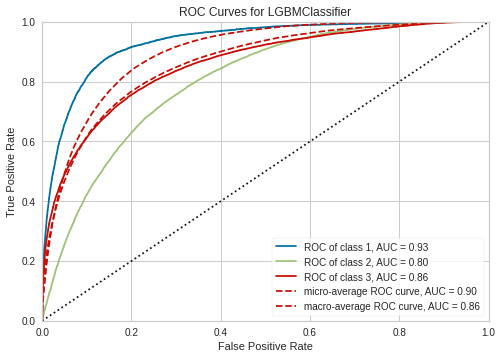

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam


model = lgbm
visualizer = ROCAUC(model)

visualizer.fit(X_train_fe, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_fe, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
labels = lgbm.classes_

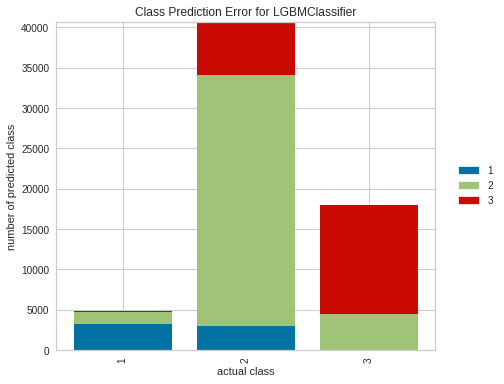

In [87]:
#How good the model has predicted class..
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(lgbm)

visualizer.fit(X_train_fe, y_train)
visualizer.score(X_test_fe, y_test)
g = visualizer.poof()

In [126]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances


model = lgbm
viz = FeatureImportances(model)
viz.fit(X_train_fe,y_train)
viz.show()

TypeError: ignored

In [ ]:
#@title
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#@title
import pandas as pd
submit = pd.read_csv('test_values.csv', header=0) 

submit.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#@title
submit['land_surface_condition'] = submit['land_surface_condition'].astype('category')
submit['foundation_type'] = submit['foundation_type'].astype('category')
submit['roof_type'] = submit['roof_type'].astype('category')
submit['ground_floor_type'] = submit['ground_floor_type'].astype('category')
submit['position'] = submit['position'].astype('category')
submit['plan_configuration'] = submit['plan_configuration'].astype('category')
submit['other_floor_type'] = submit['other_floor_type'].astype('category')
submit['legal_ownership_status'] = submit['legal_ownership_status'].astype('category')


submit['has_superstructure_adobe_mud'] = submit['has_superstructure_adobe_mud'].astype('category')
submit['has_superstructure_mud_mortar_stone'] = submit['has_superstructure_mud_mortar_stone'].astype('category')
submit['has_superstructure_stone_flag'] = submit['has_superstructure_stone_flag'].astype('category')
submit['has_superstructure_mud_mortar_brick'] = submit['has_superstructure_mud_mortar_brick'].astype('category')
submit['has_superstructure_cement_mortar_brick'] = submit['has_superstructure_cement_mortar_brick'].astype('category')
submit['has_superstructure_cement_mortar_stone'] = submit['has_superstructure_cement_mortar_stone'].astype('category')
submit['has_superstructure_timber'] = submit['has_superstructure_timber'].astype('category')
submit['has_superstructure_bamboo'] = submit['has_superstructure_bamboo'].astype('category')
submit['has_superstructure_rc_non_engineered'] = submit['has_superstructure_rc_non_engineered'].astype('category')
submit['has_superstructure_rc_engineered'] = submit['has_superstructure_rc_engineered'].astype('category')
submit['has_superstructure_other'] = submit['has_superstructure_other'].astype('category')
submit['has_secondary_use'] = submit['has_secondary_use'].astype('category')
submit['has_secondary_use_agriculture'] = submit['has_secondary_use_agriculture'].astype('category')
submit['has_secondary_use_hotel'] = submit['has_secondary_use_hotel'].astype('category')
submit['has_secondary_use_rental'] = submit['has_secondary_use_rental'].astype('category')
submit['has_secondary_use_institution'] = submit['has_secondary_use_institution'].astype('category')
submit['has_secondary_use_school'] = submit['has_secondary_use_school'].astype('category')
submit['has_secondary_use_industry'] = submit['has_secondary_use_industry'].astype('category')
submit['has_secondary_use_health_post'] = submit['has_secondary_use_health_post'].astype('category')
submit['has_secondary_use_gov_office'] = submit['has_secondary_use_gov_office'].astype('category')
submit['has_secondary_use_use_police'] = submit['has_secondary_use_use_police'].astype('category')
submit['has_secondary_use_other'] = submit['has_secondary_use_other'].astype('category')

submit['geo_level_1_id'] = submit['geo_level_1_id'].astype('category')
submit['geo_level_2_id'] = submit['geo_level_2_id'].astype('category')
submit['geo_level_3_id'] = submit['geo_level_3_id'].astype('category')




In [ ]:
scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(submit[['age']])
submit['age'] = scaler.transform(submit[['age']])

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(submit[['height_percentage']])
submit['height_percentage'] = scaler.transform(submit[['height_percentage']]) 

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(submit[['area_percentage']])
submit['area_percentage'] = scaler.transform(submit[['area_percentage']]) 

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(submit[['count_floors_pre_eq']])
submit['count_floors_pre_eq'] = scaler.transform(submit[['count_floors_pre_eq']])

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(submit[['count_families']])
submit['count_families'] = scaler.transform(submit[['count_families']]) 

submit['A_H'] = submit['area_percentage'] * submit['height_percentage']

submit['A_H'] = submit['area_percentage'] * submit['height_percentage']


In [ ]:
ce_me = ce.MEstimateEncoder(cols = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status','has_superstructure_adobe_mud',
                                    'has_superstructure_mud_mortar_stone','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_cement_mortar_stone',
                                    'has_secondary_use','has_secondary_use_agriculture','has_superstructure_timber','has_superstructure_stone_flag','has_superstructure_cement_mortar_brick','has_superstructure_bamboo'],m=2)

X_train_fe=ce_me.fit_transform(X_train,y_train)
predict_fe=ce_me.transform(submit)

In [ ]:
predict_fe = predict_fe.drop(columns = ['ground_floor_type','count_floors_pre_eq','has_secondary_use_rental','has_secondary_use_hotel','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other'])
predict_fe.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_industry,A_H
0,300051,2.794519,2.690489,2.654859,3.044522,2.079442,1.945910,2.23464,2.329752,2.269715,2.315472,2.229486,2.24419,2.228304,2.337704,2.231378,2.243863,0,2.283197,2.263805,2.250916,2.259074,2.252682,0,2.244698,0.693147,2.256289,2.237394,0,4.046406
1,99355,2.165634,2.169729,2.053083,3.258097,2.639057,1.791759,2.23464,2.329752,2.269715,2.315472,2.229486,2.24419,2.228304,2.337704,2.231378,2.243863,0,2.283197,2.263805,2.250916,2.259074,2.252682,0,2.244698,0.693147,2.100317,2.260358,0,4.728556
2,890251,1.997679,2.135689,2.492581,1.791759,1.609438,1.791759,2.23464,2.329752,2.269715,2.315472,2.229486,2.24419,2.228304,2.337704,2.231378,2.243863,0,2.283197,2.263805,2.250916,2.259074,2.252682,0,2.244698,0.693147,2.256289,2.237394,0,2.883726
3,745817,1.732428,1.528920,1.432779,0.000000,2.995732,1.386294,2.23464,2.329752,1.577251,2.046194,2.309835,2.24419,2.228304,1.922090,2.231378,2.243863,0,1.694777,2.263805,2.250916,2.259074,2.252682,0,2.244698,1.098612,2.100317,2.237394,0,4.152967
4,421793,2.794519,2.680775,2.792808,2.772589,2.197225,2.079442,2.23464,2.329752,2.321114,2.315472,2.309835,2.24419,2.228304,2.337704,2.231378,2.243863,0,2.283197,2.263805,2.250916,2.259074,2.252682,0,2.244698,0.693147,2.256289,2.237394,0,4.569000


In [ ]:
#Predicting using lgbm 
y_submit = automl.predict(predict_fe)

y_submit

array([3, 2, 3, ..., 2, 2, 2])

In [ ]:
#@title
submission = pd.DataFrame({
        "building_id": submit["building_id"],
        "damage_grade": y_submit
    })

submission.to_csv('mySubmission_lgbm3.csv', index=False)

Can do for Feature Selection:

In [ ]:
#@title
#If want to improve more on the model...
from sklearn.feature_selection import SelectKBest, chi2

#sel=SelectKBest(chi2,k=35)
sel=sel.fit(X_train,y_train)

#X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)

In [ ]:
#@title
# Need to create code for the model
# Need to type in Cross validation code..
# Need to type hyperparameter tuning with it too

#run cv for every combo of hyperparameter tuning (searh.results for the best...)

#retrain on the best combination

#Random Forest

In [99]:
from flaml import AutoML
automl2 = AutoML()


settings = {
    "metric": 'micro_f1',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
    "log_file_name": 'earthquake_experiment.log',
    "eval_method":'auto',
    "model_history":True
}

In [100]:
automl2.fit(X_train_fe, y_train, estimator_list=["rf"],**settings)

[flaml.automl: 07-31 23:17:00] {913} INFO - Evaluation method: holdout
[flaml.automl: 07-31 23:17:00] {607} INFO - Using StratifiedKFold
[flaml.automl: 07-31 23:17:00] {934} INFO - Minimizing error metric: 1-micro_f1
[flaml.automl: 07-31 23:17:00] {954} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 07-31 23:17:00] {1020} INFO - iteration 0, current learner rf
[flaml.automl: 07-31 23:17:01] {1180} INFO -  at 2.6s,	best rf's error=0.2919,	best rf's error=0.2919
[flaml.automl: 07-31 23:17:01] {1020} INFO - iteration 1, current learner rf
[flaml.automl: 07-31 23:17:01] {1180} INFO -  at 2.9s,	best rf's error=0.2650,	best rf's error=0.2650
[flaml.automl: 07-31 23:17:01] {1020} INFO - iteration 2, current learner rf
[flaml.automl: 07-31 23:17:01] {1180} INFO -  at 3.3s,	best rf's error=0.2650,	best rf's error=0.2650
[flaml.automl: 07-31 23:17:01] {1020} INFO - iteration 3, current learner rf
[flaml.automl: 07-31 23:17:02] {1180} INFO -  at 3.9s,	best rf's error=0.2650,	best

In [101]:
automl2.model.estimator

RandomForestClassifier(max_features=0.6474332373706322, max_leaf_nodes=173,
                       n_estimators=4, n_jobs=-1)

In [102]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl2.best_estimator)
print('Best hyperparmeter config:', automl2.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl2.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl2.best_config_train_time))

print('Best hyperparmeter config:', automl2.best_config)

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.6474332373706322, 'max_leaves': 173, 'criterion': 'gini', 'FLAML_sample_size': 175905}
Best accuracy on validation data: 0.7514
Training duration of best run: 2.661 s
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.6474332373706322, 'max_leaves': 173, 'criterion': 'gini', 'FLAML_sample_size': 175905}


In [103]:
#PREDICTING ON THE TESTING SET
y_pred_rf = automl2.predict(X_test_fe)

y_pred_prob_rf=automl2.predict_proba(X_test_fe)

MODEL PERFORMANCE

In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)

array([[ 3015,  3244,    88],
       [ 1492, 31292,  4210],
       [  116,  8535, 13159]])

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.65      0.48      0.55      6347
           2       0.73      0.85      0.78     36994
           3       0.75      0.60      0.67     21810

    accuracy                           0.73     65151
   macro avg       0.71      0.64      0.67     65151
weighted avg       0.73      0.73      0.72     65151



Manually creating RF from AutoML

In [113]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(max_features=0.6474332373706322, max_leaf_nodes=173,
                       n_estimators=4, n_jobs=-1) # recall what random_state mean

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train_fe, y_train)

RandomForestClassifier(max_features=0.6474332373706322, max_leaf_nodes=173,
                       n_estimators=4, n_jobs=-1)

In [114]:
test_rf = classifier_RF.predict(X_test_fe)

test_prob_rf=classifier_RF.predict_proba(X_test_fe)

class_names = [str(x) for x in classifier_RF.classes_]

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, test_rf)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, test_rf)))
print("F1 Score = {:.2f}".format(f1_score(y_test, test_rf,average='micro')))
print("Log Loss = {:.2f}".format(log_loss(y_test, test_prob_rf)))

Accuracy = 0.73
Kappa = 0.49
F1 Score = 0.73
Log Loss = 0.62


In [117]:
# Lets look at the model metrics

print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, test_rf))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, test_rf))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, test_rf)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, test_rf)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, test_rf)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, test_rf)))



Metrics of the Random Forest model: 

Confusion matrix: 
[[ 3049  1516   120]
 [ 3206 31053  8362]
 [   92  4425 13328]]
                                   Accuracy: 0.87837420152483
                   SENSITIVITY (aka RECALL): 0.9534526697166017
                 SPECIFICITY (aka FALL-OUT): 0.4874500399680256
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.9064187512770366
                 NEGATIVE PREDICTIVE VALUE): 0.667907995618839


0.7280011051250173

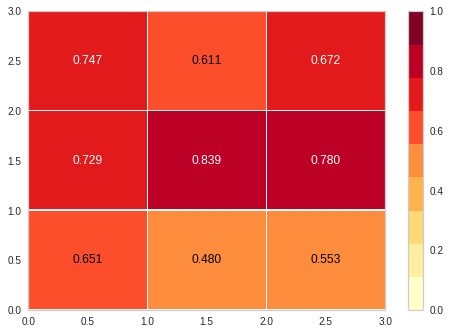

In [119]:
# Visualizing LGBM Model
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(classifier_RF,force_model=True)

visualizer.fit(X_train_fe, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_fe, y_test)  # Evaluate the model on the test data

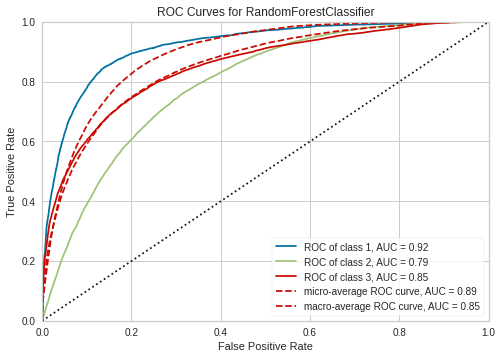

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam


model = classifier_RF
visualizer = ROCAUC(model)

visualizer.fit(X_train_fe, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_fe, y_test)        # Evaluate the model on the test data
visualizer.show() 

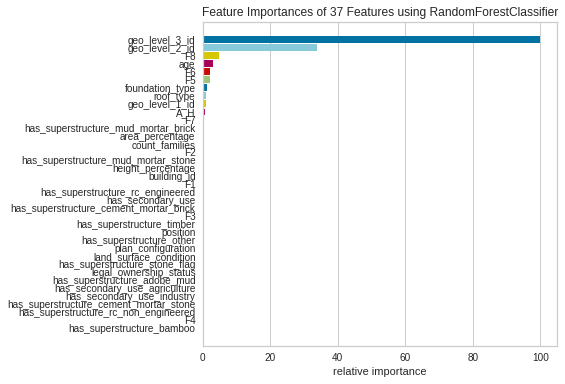

In [124]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances


model = classifier_RF
viz = FeatureImportances(model)
viz.fit(X_train_fe, y_train)
viz.show()

#XGBOOST

In [ ]:
classifier_GBM = GradientBoostingClassifier(random_state=77300)

classifier_GBM.fit(X_train, y_train)

In [ ]:
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['edible', 'poisonous'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(X, y, model)